In [75]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
# plt.style.use('fivethirtyeight')

In [76]:
order_df = pd.read_csv("data/order-of-australia.csv")

In [77]:
order_df.dtypes

field           object
percent_male     int64
dtype: object

In [78]:
order_df.head()

,field,percent_male
0,Architecture,100
1,Building and Construction,100
2,Business & Commerce,55
3,Community,62
4,Community - Multicultural Affairs,73


In [79]:
def percent_female(x):
    return 100 - x['percent_male']

In [80]:
order_df['percent_female'] = order_df.apply(percent_female, axis=1)

In [81]:
order_df.head()

,field,percent_male,percent_female
0,Architecture,100,0
1,Building and Construction,100,0
2,Business & Commerce,55,45
3,Community,62,38
4,Community - Multicultural Affairs,73,27


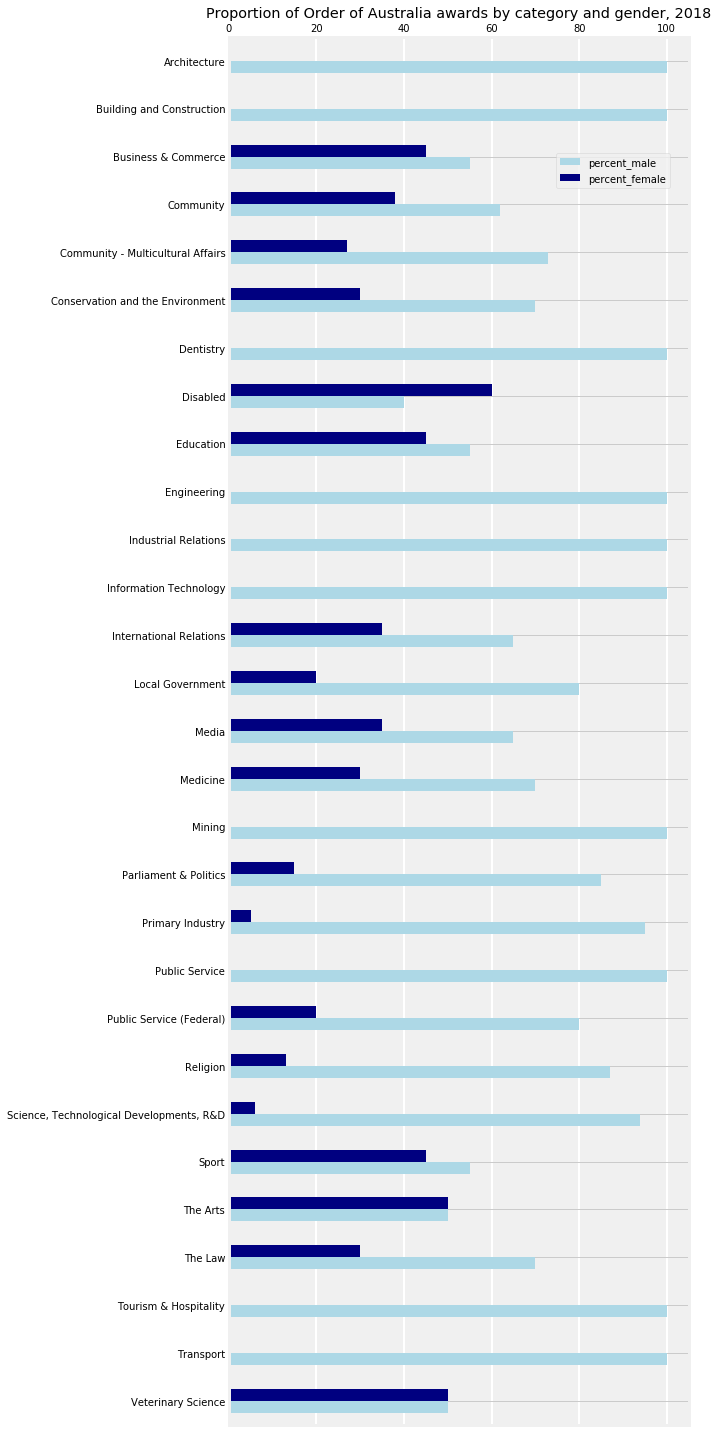

In [91]:
ax = order_df.sort_values(by='field', ascending=False).plot(kind='barh', x='field', y=['percent_male','percent_female'], color=['lightblue','navy'],figsize=(10, 20))
ax.set_title('Proportion of Order of Australia awards by category and gender, 2018')
ax.legend(bbox_to_anchor=(.7, .92))
ax.grid(color='w', linestyle='-', linewidth=2, axis='x')
ax.xaxis.tick_top()
plt.tight_layout()
ax.set_xlabel('')
ax.set_ylabel('')

plt.savefig("gdn_1.pdf", facecolor='w', bbox_inches="tight")

In [5]:
oxfam_df = pd.read_csv("data/oxfam.csv")

In [7]:
oxfam_df.dtypes

rank                   int64
metric                object
dist_from_avg_rank     int64
dtype: object

In [137]:
oxfam_df

,rank,metric,dist_from_avg_rank
0,28,Spending (overall),48
1,31,Tax (overall),45
2,5,Labour,64
3,109,Education,-30
4,71,Health,5
5,60,Spending Effort,17
6,24,Spending Incidence,52
7,96,Tax Structure,-20
8,19,Tax Incidence,58
9,53,Tax Effort,23


In [221]:
def build_colors(x):
    if x.dist_from_avg_rank > 0:
        return '#075B8C'
    else:
        return '#E32128'

In [222]:
colors = oxfam_df.iloc[::-1].apply(build_colors, axis=1)

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Additional positional arguments to set_ticklabels are ignored, and deprecated since Matplotlib 3.1; passing them will raise a TypeError in Matplotlib 3.3.
  """


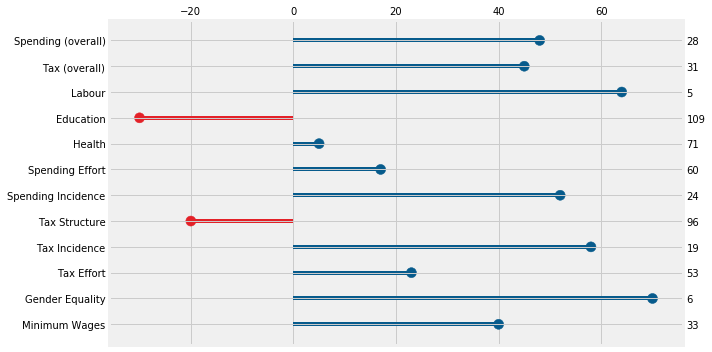

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hlines(xmin=0, xmax=oxfam_df['dist_from_avg_rank'].iloc[::-1], y=oxfam_df.index, color=colors)
ax.xaxis.tick_top()
ax.set_yticks(oxfam_df.index)
ax.yaxis.set_ticklabels(oxfam_df['metric'].iloc[::-1], oxfam_df['rank'].iloc[::-1])
legend = [ax.scatter(x=oxfam_df['dist_from_avg_rank'].iloc[::-1], y=oxfam_df.index, s=100, color=colors)]

alt = ax.twinx()
alt.set_yticks(ax.yaxis.get_ticklocs()) 
alt.set_ylim(ax.get_ylim())
alt.yaxis.set_ticklabels(oxfam_df['rank'].iloc[::-1])

plt.tight_layout()
plt.savefig('gdn_2.pdf', facecolor='w')

In [8]:
commute_df = pd.read_csv("data/commute.csv")

In [10]:
commute_df.dtypes

country         object
source          object
destination     object
distance         int64
pct_wages      float64
dtype: object

In [159]:
commute_df.head()

,country,source,destination,distance,pct_wages
0,UK,Luton,London St Pancras,35,14.0
1,UK,Liverpool Lime St,Manchester Piccadilly,32,10.6
2,Germany,Brandenburg,Berlin,43,7.9
3,Finland,Karis,Helsinki,47,6.6
4,Sweden,Uppsala,Stockholm,45,6.4


In [196]:
def build_colors(x):
    if x.country == 'UK':
        return '#B62972'
    else:
        return 'gray'
    
colors = commute_df.iloc[::-1].apply(build_colors, axis=1)

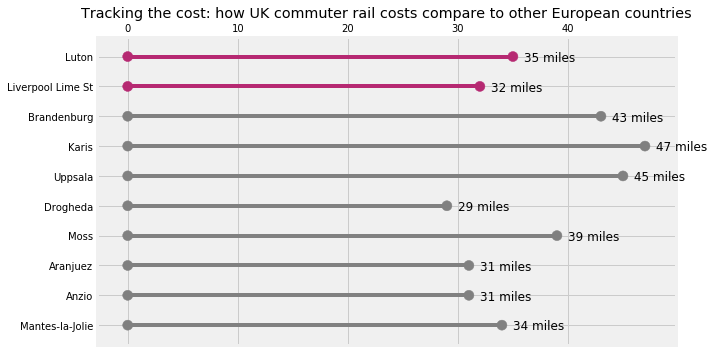

In [218]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hlines(xmin=0, xmax=commute_df['distance'].iloc[::-1], y=commute_df.index, color=colors)
ax.xaxis.tick_top()
ax.set_yticks(commute_df.index)

ax.set_title('Tracking the cost: how UK commuter rail costs compare to other European countries')

ax.yaxis.set_ticklabels(commute_df['source'].iloc[::-1])
legend = [ax.scatter(x=commute_df['distance'].iloc[::-1], y=commute_df.index, s=100, color=colors), ax.scatter(x=commute_df['distance'].iloc[::-1]-commute_df['distance'].iloc[::-1], y=commute_df.index, s=100, color=colors)]

for i, v in enumerate(commute_df['distance'].iloc[::-1]):
    ax.text(v + 1, i - .15, str(v) + ' miles', color='black', fontsize=12)

plt.tight_layout()
plt.savefig('gdn_3.pdf', facecolor='w', bb_inches='tight')